In [1]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

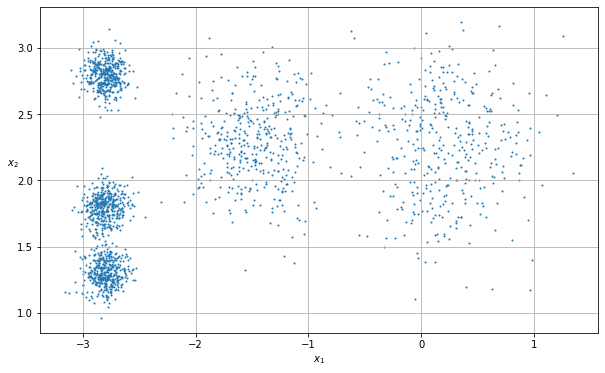

In [2]:
blob_centers = np.array([[ 0.2,  2.3], [-1.5 ,  2.3], [-2.8,  1.8],
                         [-2.8,  2.8], [-2.8,  1.3]])
blob_std = np.array([0.4, 0.3, 0.1, 0.1, 0.1])
X, y = make_blobs(n_samples=2000, centers=blob_centers, cluster_std=blob_std,
                  random_state=7)

plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], s=1)
plt.xlabel("$x_1$")
plt.ylabel("$x_2$", rotation=0)
plt.grid()
plt.show()

Original Centroids [ 0.2,  2.3], 
 [-1.5 ,  2.3], 
 [-2.8,  1.8], 
 [-2.8,  2.8], 
 [-2.8,  1.3]
Centroids from KMeans 
 [[ 0.20876306  2.25551336]
 [-2.80389616  1.80117999]
 [-2.80037642  1.30082566]
 [-1.46679593  2.28585348]
 [-2.79290307  2.79641063]]


<Figure size 1080x360 with 0 Axes>

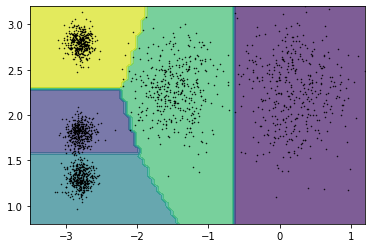

In [8]:
k = 5
kmeans = KMeans(n_clusters=k, init='random', n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)
print('Original Centroids', '[ 0.2,  2.3], \n [-1.5 ,  2.3], \n [-2.8,  1.8], \n [-2.8,  2.8], \n [-2.8,  1.3]')
print("Centroids from KMeans \n", kmeans.cluster_centers_)

from sklearn.inspection import DecisionBoundaryDisplay

plt.figure(figsize=(15, 5))
disp = DecisionBoundaryDisplay.from_estimator(kmeans,X,response_method="predict",alpha=0.7)
plt.scatter(X[:, 0], X[:, 1], s=1,marker='.',c='k')
plt.axis([-3.5,1.2,0.8,3.2])
plt.show()

## Elbow Method

For Clusters 2 the silhoutte score is 0.5953628624305034
For Clusters 3 the silhoutte score is 0.5723900247411775
For Clusters 4 the silhoutte score is 0.688531617595759
For Clusters 5 the silhoutte score is 0.6353422668284152
For Clusters 6 the silhoutte score is 0.6020248775444942
For Clusters 7 the silhoutte score is 0.6073764342983768
For Clusters 8 the silhoutte score is 0.559896794544462
For Clusters 9 the silhoutte score is 0.5669953803277178
For Clusters 10 the silhoutte score is 0.5613298482947564


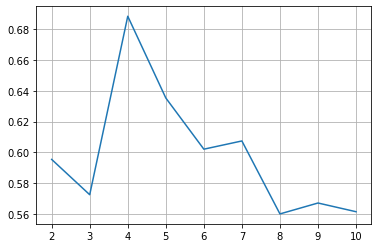

In [9]:
score = []
for k in [2,3,4,5,6,7,8,9,10]:
    kmeans = KMeans(n_clusters=k, n_init=5, random_state=42)
    y_pred = kmeans.fit_predict(X)
    score.append(silhouette_score(X,y_pred))
    print('For Clusters',k,'the silhoutte score is',silhouette_score(X,y_pred, random_state=42))

plt.plot([2,3,4,5,6,7,8,9,10], score)
plt.grid()
plt.show()

## Iris dataset

In [10]:
from sklearn.datasets import load_iris
data = load_iris()
X = data.data
y = data.target
print(data.feature_names)
print(data.target_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


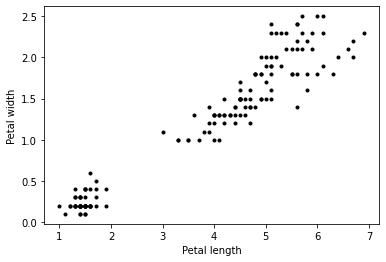

In [11]:
plt.scatter(X[:, 2], X[:, 3], c="k", marker=".")
plt.xlabel("Petal length")
plt.ylabel("Petal width")
plt.show()

In [12]:
X = X[:,2:]
X[:2]

array([[1.4, 0.2],
       [1.4, 0.2]])

For Clusters 2 the silhoutte score is 0.7653904101258123
For Clusters 3 the silhoutte score is 0.6604800083974887
For Clusters 4 the silhoutte score is 0.6111992021278091
For Clusters 5 the silhoutte score is 0.5747272589044762
For Clusters 6 the silhoutte score is 0.5660427512045026


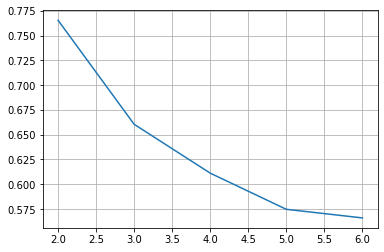

In [14]:
score = []
for k in [2,3,4,5,6]:
    kmeans = KMeans(n_clusters=k, init='random', n_init=10, random_state=42)
    y_pred = kmeans.fit_predict(X)
    score.append(silhouette_score(X,y_pred))
    print('For Clusters',k,'the silhoutte score is',silhouette_score(X,y_pred, random_state=42))

plt.plot([2,3,4,5,6], score)
plt.grid()
plt.show()

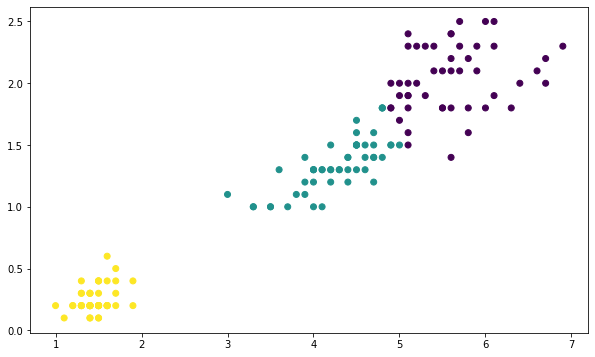

In [15]:
k = 3
kmeans = KMeans(n_clusters=k, init='random', n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X)
plt.figure(figsize=(10,6))
plt.scatter(X[:, 0], X[:, 1], c=y_pred, marker="o")
plt.show()